In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.externals import joblib 
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import GridSearchCV , cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import catboost as cb

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Import Taiwan Data

In [4]:
data = pd.read_excel(r"BankOfTaiwan.xls",skiprows=1,index_col=0)

## Data Understanding

### Desciption of the Data

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


There are 30,000 distinct credit card clients .

There are no missing data in the whole dataset.

The mean value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either married or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2, min being 21 (must be a legal age) and max being 79.

The target value is default.payment.next.month. This indicates if a client will default payment next month. As the value 0 for default payment means not default and value 1 means default, the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

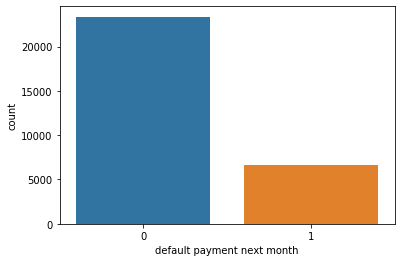

In [4]:
sns.countplot(data['default payment next month'],label="Count")
plt.show()

 Percentage of Defaulters(1) are smaller than the Non Defaulters(0)

In [5]:
#Percentage of Non Defaulters
23364/(23364)

1.0

In [6]:
#Percentage of Defaulters
6636/(23364+6636)

0.2212

# Credit limit vs. sex

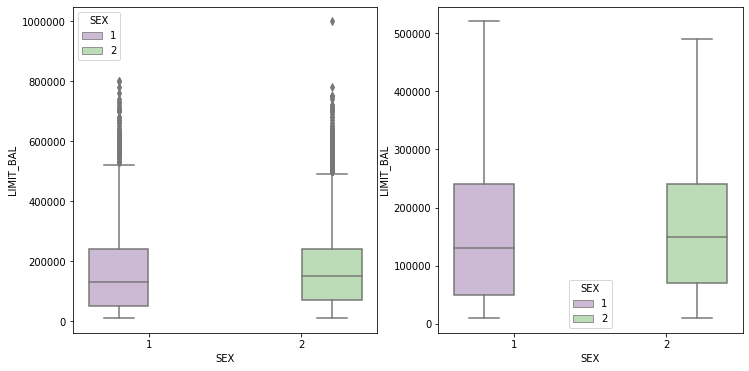

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1,x="SEX",y="LIMIT_BAL", hue="SEX",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2,x="SEX", y="LIMIT_BAL", hue="SEX",data=data, palette="PRGn",showfliers=False)
plt.show();

The limit credit amount is quite balanced between sex.

# Features Correlation

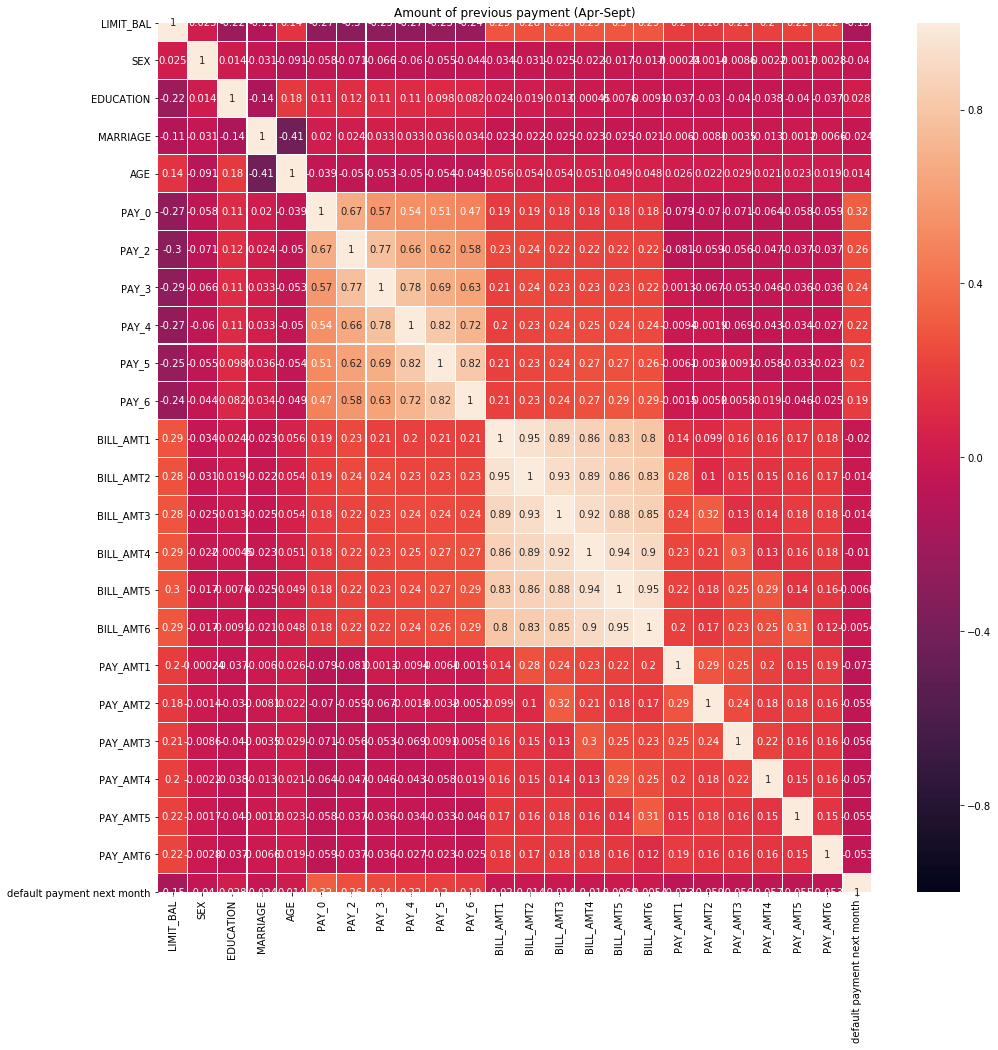

In [8]:
plt.figure(figsize = (16,16))
plt.title('Amount of previous payment (Apr-Sept)')
corr = data.corr()
corr.index = data.columns
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

The PAY_0, PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 variables are the strongest predictors of default 

# Correlation with default

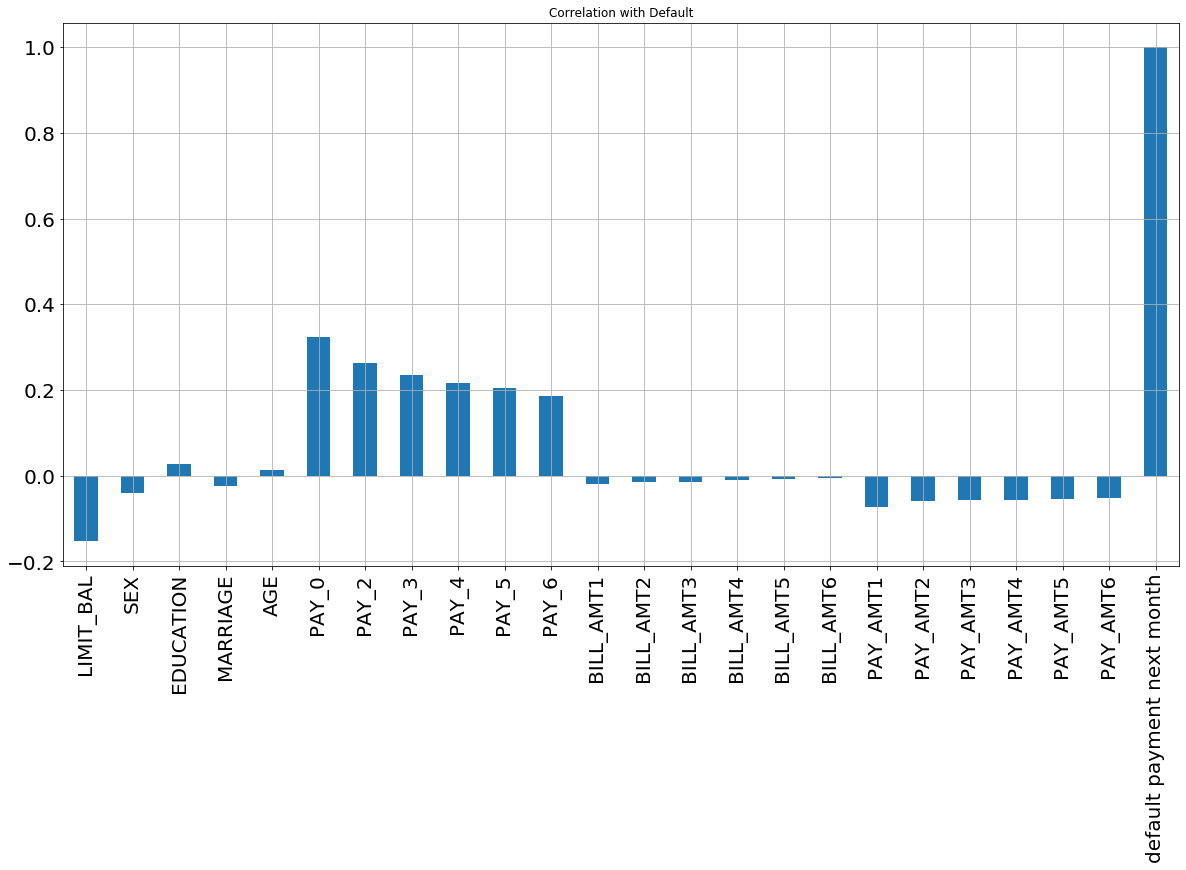

In [9]:
data.corrwith(data['default payment next month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True);

In [10]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
data["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [12]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

The 0 (undocumented) in MARRIAGE can be categorized as 'Other' (3).

The 0, 5 and 6 (undocumented) in EDUCATION can be put in a 'Other' cathegory (4)

In [13]:
data.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [14]:
data.PAY_2.unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [15]:
data.PAY_3.unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [16]:
data.PAY_4.unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [17]:
data.PAY_5.unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [18]:
data.PAY_6.unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5], dtype=int64)

the -2,0(undocumented) in pay_X so we will try to change The values -2,-1 to other (0)

## Cleaning The Data

In [5]:
def replaceModalitites(data, racine, cible):
    return data.replace(to_replace=racine, value=cible)

In [6]:
#Education
education=data["EDUCATION"]
education=pd.DataFrame(education)
education=replaceModalitites(education,[0,5,6],[4,4,4])

#Mariage
marriage=data["MARRIAGE"]
marriage=pd.DataFrame(marriage)
marriage=replaceModalitites(marriage,[0],[3])

In [7]:
data["EDUCATION"]=education
data["MARRIAGE"]=marriage

In [8]:
data.drop(columns=["LIMIT_BAL","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","SEX","MARRIAGE"],inplace=True)

In [9]:
fil = (data.PAY_0 == -1) | (data.PAY_0==-2)
data.loc[fil,'PAY_0']=0
fil = (data.PAY_2 == -1) | (data.PAY_2==-2)
data.loc[fil,'PAY_2']=0
fil = (data.PAY_3 == -1) | (data.PAY_3==-2)
data.loc[fil,'PAY_3']=0
fil = (data.PAY_4 == -1) | (data.PAY_4==-2)
data.loc[fil,'PAY_4']=0
fil = (data.PAY_5 == -1) | (data.PAY_5==-2)
data.loc[fil,'PAY_5']=0
fil = (data.PAY_6 == -1) | (data.PAY_6==-2)
data.loc[fil,'PAY_6']=0

## Clustering

## Classification

In [10]:
# To look for best algorithm
Models_results=pd.DataFrame()

### Divide Train and Test Split

In [13]:
y = data.iloc[:,-1]   # Enregistrer la varialbe target
x = data.iloc[:,0:-1]; # Enleveer la colonne target

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Logistic Regression

In [28]:
def Logistic_Regression():
    log = LogisticRegression(random_state=1)
    log_model= log.fit(X_train,y_train)
    print(log_model,'\n')
    y_pred_log_reg = log_model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_log_reg))
    print(classification_report(y_test,y_pred_log_reg))
    roc=roc_auc_score(y_test, y_pred_log_reg)
    acc = accuracy_score(y_test,y_pred_log_reg)
    prec = precision_score(y_test, y_pred_log_reg)
    rec = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    model =  pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Logistic_Regression classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
    print('Accuracy of Logistic_Regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
    joblib.dump(log, 'Taiwan_Logistic_Regression.pkl') 
    return M

In [29]:
Models_results=Logistic_Regression()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

[[5613  219]
 [1219  449]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5832
           1       0.67      0.27      0.38      1668

    accuracy                           0.81      7500
   macro avg       0.75      0.62      0.64      7500
weighted avg       0.79      0.81      0.77      7500

Accuracy of Logistic_Regression classifier on training set: 0.81
Accuracy of Logistic_Regression classifier on test set: 0.81


### Catboost

In [16]:
def Catboost():    
    catt = cb.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=0)
    catt_model=catt.fit(X_train, y_train,eval_set=(X_test,y_test))
    y_pred_catt = catt_model.predict(X_test)
    print(catt_model,'\n')
    print(confusion_matrix(y_test,y_pred_catt))
    print(classification_report(y_test,y_pred_catt))
    roc=roc_auc_score(y_test,y_pred_catt)
    acc = accuracy_score(y_test,y_pred_catt)
    prec = precision_score(y_test,y_pred_catt)
    rec = recall_score(y_test,y_pred_catt)
    f1 = f1_score(y_test,y_pred_catt)
    model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))
    joblib.dump(catt, 'Taiwan_Catboost.pkl') 
    return M

In [17]:
Models_results=Catboost()

Learning rate set to 0.108201
0:	learn: 0.8215111	test: 0.8177333	best: 0.8177333 (0)	total: 118ms	remaining: 1m 58s
1:	learn: 0.8214222	test: 0.8174667	best: 0.8177333 (0)	total: 173ms	remaining: 1m 26s
2:	learn: 0.8214222	test: 0.8185333	best: 0.8185333 (2)	total: 232ms	remaining: 1m 17s
3:	learn: 0.8216444	test: 0.8192000	best: 0.8192000 (3)	total: 287ms	remaining: 1m 11s
4:	learn: 0.8220889	test: 0.8189333	best: 0.8192000 (3)	total: 340ms	remaining: 1m 7s
5:	learn: 0.8222222	test: 0.8188000	best: 0.8192000 (3)	total: 407ms	remaining: 1m 7s
6:	learn: 0.8221333	test: 0.8185333	best: 0.8192000 (3)	total: 475ms	remaining: 1m 7s
7:	learn: 0.8222222	test: 0.8192000	best: 0.8192000 (3)	total: 531ms	remaining: 1m 5s
8:	learn: 0.8226667	test: 0.8190667	best: 0.8192000 (3)	total: 585ms	remaining: 1m 4s
9:	learn: 0.8228444	test: 0.8186667	best: 0.8192000 (3)	total: 645ms	remaining: 1m 3s
10:	learn: 0.8226667	test: 0.8185333	best: 0.8192000 (3)	total: 710ms	remaining: 1m 3s
11:	learn: 0.822355

97:	learn: 0.8259556	test: 0.8180000	best: 0.8200000 (13)	total: 5.4s	remaining: 49.7s
98:	learn: 0.8259556	test: 0.8180000	best: 0.8200000 (13)	total: 5.46s	remaining: 49.7s
99:	learn: 0.8261333	test: 0.8178667	best: 0.8200000 (13)	total: 5.52s	remaining: 49.7s
100:	learn: 0.8259111	test: 0.8178667	best: 0.8200000 (13)	total: 5.58s	remaining: 49.7s
101:	learn: 0.8259556	test: 0.8180000	best: 0.8200000 (13)	total: 5.66s	remaining: 49.8s
102:	learn: 0.8260889	test: 0.8180000	best: 0.8200000 (13)	total: 5.72s	remaining: 49.8s
103:	learn: 0.8263111	test: 0.8178667	best: 0.8200000 (13)	total: 5.77s	remaining: 49.7s
104:	learn: 0.8264000	test: 0.8178667	best: 0.8200000 (13)	total: 5.82s	remaining: 49.6s
105:	learn: 0.8264889	test: 0.8178667	best: 0.8200000 (13)	total: 5.87s	remaining: 49.5s
106:	learn: 0.8265333	test: 0.8184000	best: 0.8200000 (13)	total: 5.94s	remaining: 49.6s
107:	learn: 0.8267111	test: 0.8182667	best: 0.8200000 (13)	total: 6s	remaining: 49.5s
108:	learn: 0.8267111	test: 

190:	learn: 0.8279556	test: 0.8196000	best: 0.8200000 (13)	total: 10.8s	remaining: 45.8s
191:	learn: 0.8279111	test: 0.8194667	best: 0.8200000 (13)	total: 10.9s	remaining: 45.8s
192:	learn: 0.8278667	test: 0.8197333	best: 0.8200000 (13)	total: 10.9s	remaining: 45.7s
193:	learn: 0.8279556	test: 0.8202667	best: 0.8202667 (193)	total: 11s	remaining: 45.6s
194:	learn: 0.8280000	test: 0.8201333	best: 0.8202667 (193)	total: 11s	remaining: 45.6s
195:	learn: 0.8280000	test: 0.8201333	best: 0.8202667 (193)	total: 11.1s	remaining: 45.4s
196:	learn: 0.8280889	test: 0.8198667	best: 0.8202667 (193)	total: 11.1s	remaining: 45.3s
197:	learn: 0.8281333	test: 0.8198667	best: 0.8202667 (193)	total: 11.2s	remaining: 45.2s
198:	learn: 0.8284000	test: 0.8190667	best: 0.8202667 (193)	total: 11.2s	remaining: 45.2s
199:	learn: 0.8284000	test: 0.8190667	best: 0.8202667 (193)	total: 11.3s	remaining: 45.1s
200:	learn: 0.8284000	test: 0.8190667	best: 0.8202667 (193)	total: 11.3s	remaining: 44.9s
201:	learn: 0.828

283:	learn: 0.8289333	test: 0.8186667	best: 0.8202667 (193)	total: 15.6s	remaining: 39.4s
284:	learn: 0.8291111	test: 0.8185333	best: 0.8202667 (193)	total: 15.7s	remaining: 39.4s
285:	learn: 0.8291111	test: 0.8185333	best: 0.8202667 (193)	total: 15.7s	remaining: 39.2s
286:	learn: 0.8290667	test: 0.8185333	best: 0.8202667 (193)	total: 15.8s	remaining: 39.3s
287:	learn: 0.8291556	test: 0.8184000	best: 0.8202667 (193)	total: 15.9s	remaining: 39.2s
288:	learn: 0.8291111	test: 0.8184000	best: 0.8202667 (193)	total: 16s	remaining: 39.3s
289:	learn: 0.8291111	test: 0.8182667	best: 0.8202667 (193)	total: 16s	remaining: 39.2s
290:	learn: 0.8291111	test: 0.8182667	best: 0.8202667 (193)	total: 16.1s	remaining: 39.1s
291:	learn: 0.8290222	test: 0.8182667	best: 0.8202667 (193)	total: 16.1s	remaining: 39.1s
292:	learn: 0.8290222	test: 0.8182667	best: 0.8202667 (193)	total: 16.2s	remaining: 39s
293:	learn: 0.8289778	test: 0.8182667	best: 0.8202667 (193)	total: 16.2s	remaining: 39s
294:	learn: 0.8289

377:	learn: 0.8307111	test: 0.8182667	best: 0.8202667 (193)	total: 20.4s	remaining: 33.5s
378:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.4s	remaining: 33.5s
379:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.5s	remaining: 33.4s
380:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.5s	remaining: 33.3s
381:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.6s	remaining: 33.3s
382:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.6s	remaining: 33.2s
383:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.7s	remaining: 33.1s
384:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.7s	remaining: 33.1s
385:	learn: 0.8307111	test: 0.8184000	best: 0.8202667 (193)	total: 20.8s	remaining: 33s
386:	learn: 0.8306667	test: 0.8184000	best: 0.8202667 (193)	total: 20.8s	remaining: 33s
387:	learn: 0.8306222	test: 0.8184000	best: 0.8202667 (193)	total: 20.9s	remaining: 32.9s
388:	learn: 0.

472:	learn: 0.8315556	test: 0.8185333	best: 0.8202667 (193)	total: 25.3s	remaining: 28.2s
473:	learn: 0.8316444	test: 0.8182667	best: 0.8202667 (193)	total: 25.4s	remaining: 28.2s
474:	learn: 0.8314222	test: 0.8186667	best: 0.8202667 (193)	total: 25.4s	remaining: 28.1s
475:	learn: 0.8314667	test: 0.8185333	best: 0.8202667 (193)	total: 25.5s	remaining: 28.1s
476:	learn: 0.8314667	test: 0.8186667	best: 0.8202667 (193)	total: 25.5s	remaining: 28s
477:	learn: 0.8314667	test: 0.8186667	best: 0.8202667 (193)	total: 25.6s	remaining: 27.9s
478:	learn: 0.8314222	test: 0.8184000	best: 0.8202667 (193)	total: 25.7s	remaining: 27.9s
479:	learn: 0.8314222	test: 0.8184000	best: 0.8202667 (193)	total: 25.7s	remaining: 27.8s
480:	learn: 0.8314222	test: 0.8186667	best: 0.8202667 (193)	total: 25.8s	remaining: 27.8s
481:	learn: 0.8314222	test: 0.8185333	best: 0.8202667 (193)	total: 25.8s	remaining: 27.7s
482:	learn: 0.8313778	test: 0.8184000	best: 0.8202667 (193)	total: 25.9s	remaining: 27.7s
483:	learn: 

565:	learn: 0.8323556	test: 0.8182667	best: 0.8202667 (193)	total: 30.4s	remaining: 23.3s
566:	learn: 0.8323556	test: 0.8182667	best: 0.8202667 (193)	total: 30.4s	remaining: 23.2s
567:	learn: 0.8323556	test: 0.8182667	best: 0.8202667 (193)	total: 30.5s	remaining: 23.2s
568:	learn: 0.8323556	test: 0.8182667	best: 0.8202667 (193)	total: 30.5s	remaining: 23.1s
569:	learn: 0.8323556	test: 0.8182667	best: 0.8202667 (193)	total: 30.6s	remaining: 23.1s
570:	learn: 0.8323556	test: 0.8182667	best: 0.8202667 (193)	total: 30.6s	remaining: 23s
571:	learn: 0.8324000	test: 0.8182667	best: 0.8202667 (193)	total: 30.7s	remaining: 23s
572:	learn: 0.8324000	test: 0.8182667	best: 0.8202667 (193)	total: 30.7s	remaining: 22.9s
573:	learn: 0.8324889	test: 0.8182667	best: 0.8202667 (193)	total: 30.8s	remaining: 22.8s
574:	learn: 0.8324000	test: 0.8182667	best: 0.8202667 (193)	total: 30.8s	remaining: 22.8s
575:	learn: 0.8324889	test: 0.8182667	best: 0.8202667 (193)	total: 30.9s	remaining: 22.7s
576:	learn: 0.

658:	learn: 0.8327111	test: 0.8193333	best: 0.8202667 (193)	total: 35s	remaining: 18.1s
659:	learn: 0.8327556	test: 0.8193333	best: 0.8202667 (193)	total: 35s	remaining: 18s
660:	learn: 0.8327556	test: 0.8194667	best: 0.8202667 (193)	total: 35.1s	remaining: 18s
661:	learn: 0.8328444	test: 0.8194667	best: 0.8202667 (193)	total: 35.1s	remaining: 17.9s
662:	learn: 0.8329333	test: 0.8193333	best: 0.8202667 (193)	total: 35.2s	remaining: 17.9s
663:	learn: 0.8329333	test: 0.8193333	best: 0.8202667 (193)	total: 35.2s	remaining: 17.8s
664:	learn: 0.8329333	test: 0.8193333	best: 0.8202667 (193)	total: 35.3s	remaining: 17.8s
665:	learn: 0.8329333	test: 0.8192000	best: 0.8202667 (193)	total: 35.3s	remaining: 17.7s
666:	learn: 0.8328444	test: 0.8190667	best: 0.8202667 (193)	total: 35.4s	remaining: 17.7s
667:	learn: 0.8328000	test: 0.8189333	best: 0.8202667 (193)	total: 35.4s	remaining: 17.6s
668:	learn: 0.8328000	test: 0.8189333	best: 0.8202667 (193)	total: 35.5s	remaining: 17.6s
669:	learn: 0.8330

751:	learn: 0.8339111	test: 0.8176000	best: 0.8202667 (193)	total: 39.6s	remaining: 13.1s
752:	learn: 0.8339111	test: 0.8176000	best: 0.8202667 (193)	total: 39.7s	remaining: 13s
753:	learn: 0.8336889	test: 0.8174667	best: 0.8202667 (193)	total: 39.7s	remaining: 13s
754:	learn: 0.8336889	test: 0.8174667	best: 0.8202667 (193)	total: 39.7s	remaining: 12.9s
755:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 39.8s	remaining: 12.8s
756:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 39.8s	remaining: 12.8s
757:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 39.9s	remaining: 12.7s
758:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 39.9s	remaining: 12.7s
759:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 40s	remaining: 12.6s
760:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 40s	remaining: 12.6s
761:	learn: 0.8337333	test: 0.8174667	best: 0.8202667 (193)	total: 40.1s	remaining: 12.5s
762:	learn: 0.8337

846:	learn: 0.8343111	test: 0.8176000	best: 0.8202667 (193)	total: 44.3s	remaining: 8s
847:	learn: 0.8342667	test: 0.8176000	best: 0.8202667 (193)	total: 44.3s	remaining: 7.94s
848:	learn: 0.8343111	test: 0.8176000	best: 0.8202667 (193)	total: 44.4s	remaining: 7.89s
849:	learn: 0.8344444	test: 0.8176000	best: 0.8202667 (193)	total: 44.4s	remaining: 7.84s
850:	learn: 0.8344444	test: 0.8177333	best: 0.8202667 (193)	total: 44.5s	remaining: 7.79s
851:	learn: 0.8345333	test: 0.8177333	best: 0.8202667 (193)	total: 44.5s	remaining: 7.74s
852:	learn: 0.8345778	test: 0.8177333	best: 0.8202667 (193)	total: 44.6s	remaining: 7.68s
853:	learn: 0.8345333	test: 0.8176000	best: 0.8202667 (193)	total: 44.6s	remaining: 7.63s
854:	learn: 0.8345333	test: 0.8176000	best: 0.8202667 (193)	total: 44.7s	remaining: 7.58s
855:	learn: 0.8345778	test: 0.8176000	best: 0.8202667 (193)	total: 44.8s	remaining: 7.53s
856:	learn: 0.8345778	test: 0.8176000	best: 0.8202667 (193)	total: 44.8s	remaining: 7.48s
857:	learn: 0

939:	learn: 0.8347556	test: 0.8173333	best: 0.8202667 (193)	total: 49s	remaining: 3.13s
940:	learn: 0.8347556	test: 0.8173333	best: 0.8202667 (193)	total: 49s	remaining: 3.08s
941:	learn: 0.8348000	test: 0.8174667	best: 0.8202667 (193)	total: 49.1s	remaining: 3.02s
942:	learn: 0.8348444	test: 0.8176000	best: 0.8202667 (193)	total: 49.1s	remaining: 2.97s
943:	learn: 0.8348444	test: 0.8174667	best: 0.8202667 (193)	total: 49.2s	remaining: 2.92s
944:	learn: 0.8348000	test: 0.8176000	best: 0.8202667 (193)	total: 49.3s	remaining: 2.87s
945:	learn: 0.8348444	test: 0.8174667	best: 0.8202667 (193)	total: 49.3s	remaining: 2.81s
946:	learn: 0.8348444	test: 0.8174667	best: 0.8202667 (193)	total: 49.4s	remaining: 2.76s
947:	learn: 0.8348000	test: 0.8174667	best: 0.8202667 (193)	total: 49.4s	remaining: 2.71s
948:	learn: 0.8347556	test: 0.8174667	best: 0.8202667 (193)	total: 49.5s	remaining: 2.66s
949:	learn: 0.8347556	test: 0.8174667	best: 0.8202667 (193)	total: 49.5s	remaining: 2.6s
950:	learn: 0.8

### GridSearch on XGBoost

In [32]:
def xgb_grid_Search():
    xgb=XGBClassifier()
    params_grid_xgb = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }
    grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=params_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
    grid_search_xgb_model = grid_search_xgb.fit(X_train,y_train)
    y_pred =grid_search_xgb.predict(X_test)
    print(grid_search_xgb,'\n')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    model =  pd.DataFrame([['XGBoost Tuned', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of XGBoost Tuned classifier on training set: {:.2f}'.format(grid_search_xgb.score(X_train, y_train)))
    print('Accuracy of XGBoost Tuned classifier on test set: {:.2f}'.format(grid_search_xgb.score(X_test, y_test)))
    joblib.dump(grid_search_xgb, 'Taiwan_XGB_GridSearch.pkl') 
    return M

In [ ]:
Models_results=xgb_grid_Search()

## SVM

In [ ]:
def Support_Vector_Machine(Models_results):    
    scv = SVC()
    svc_model=scv.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)
    print(svc_model,'\n')
    print(confusion_matrix(y_test,y_pred_svm))
    print(classification_report(y_test,y_pred_svm))
    roc=roc_auc_score(y_test,y_pred_svm)
    acc = accuracy_score(y_test,y_pred_svm)
    prec = precision_score(y_test,y_pred_svm)
    rec = recall_score(y_test,y_pred_svm)
    f1 = f1_score(y_test,y_pred_svm)
    model =  pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(scv.score(X_train, y_train)))
    print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(scv.score(X_test, y_test)))
    # Save the model as a pickle in a file 
    joblib.dump(scv, 'Taiwan_Support_Vector_Machine.pkl') 
    return M

In [ ]:
Models_results=Support_Vector_Machine(Models_results)

## Stochastic Gradient Descent

In [ ]:
def Stochastic_Gradient_Descent(Models_results):    
    sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
    sgd_model=sgd.fit(X_train, y_train)
    y_pred_stochastic_gradient_descent = sgd_model.predict(X_test)
    print(sgd_model,'\n')
    print(confusion_matrix(y_test,y_pred_stochastic_gradient_descent))
    print(classification_report(y_test,y_pred_stochastic_gradient_descent))
    roc=roc_auc_score(y_test,y_pred_stochastic_gradient_descent)
    acc = accuracy_score(y_test,y_pred_stochastic_gradient_descent)
    prec = precision_score(y_test,y_pred_stochastic_gradient_descent)
    rec = recall_score(y_test,y_pred_stochastic_gradient_descent)
    f1 = f1_score(y_test,y_pred_stochastic_gradient_descent)
    model =  pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Stochastic Gradient Descent classifier on training set: {:.2f}'.format(sgd.score(X_train, y_train)))
    print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
    # Save the model as a pickle in a file 
    joblib.dump(sgd, 'Taiwan_Stochastic_Gradient_Descent.pkl') 
    return M

In [ ]:
Models_results=Stochastic_Gradient_Descent(Models_results)

### Conclusion

In [ ]:
Models_results.sort_values(by=["Precision"],ascending=False)